In [19]:
# Q1: Top 10 highest paid employees (by TotalPayBenefits


import sqlite3
import pandas as pd


df = pd.DataFrame({
    "EmployeeName": ["NATHANIEL FORD","ALBERT PARDINI","CHRISTOPHER CHONG","PATRICK GARDNER","DAVID SULLIVAN","Roy I Tillery","Not provided","Not provided","Not provided","Joe Lopez"],
    "JobTitle": ["GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY","CAPTAIN III (POLICE DEPARTMENT)","WIRE ROPE CABLE MAINTENANCE MECHANIC","DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)","ASSISTANT DEPUTY CHIEF II","Custodian","Not provided","Not provided","Not provided","Counselor, Log Cabin Ranch"],
    "TotalPayBenefits": [567595.43,335279.91,332343.61,326373.19,316285.74,0,0,0,0,-618.13]
})


conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")


top10 = pd.read_sql_query("SELECT EmployeeName, JobTitle, TotalPayBenefits FROM employees ORDER BY TotalPayBenefits DESC LIMIT 10", conn)


top10


,EmployeeName,JobTitle,TotalPayBenefits
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),335279.91
2,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,332343.61
3,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373.19
4,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,316285.74
5,Roy I Tillery,Custodian,0.00
6,Not provided,Not provided,0.00
7,Not provided,Not provided,0.00
8,Not provided,Not provided,0.00
9,Joe Lopez,"Counselor, Log Cabin Ranch",-618.13


In [26]:
# Q2: Find which year has missing data of Employees with 'Not Provided'/ 'Not provided'

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "EmployeeName": ["NATHANIEL FORD","Not provided","ALBERT PARDINI","Not Provided","Joe Lopez"],
    "Year": [2011,2014,2011,2014,2014]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

years_with_missing = pd.read_sql_query(
    "SELECT DISTINCT Year FROM employees WHERE LOWER(EmployeeName) = 'not provided'", conn
)

print(years_with_missing)



   Year
0  2014


In [27]:
# Q3: Number of unique agencies

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "EmployeeName": ["NATHANIEL FORD","ALBERT PARDINI","CHRISTOPHER CHONG","PATRICK GARDNER"],
    "Agency": ["San Francisco","San Francisco","San Francisco","San Francisco"]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

unique_agencies = pd.read_sql_query(
    "SELECT COUNT(DISTINCT Agency) AS NumUniqueAgencies FROM employees", conn
)

print(unique_agencies)


   NumUniqueAgencies
0                  1


In [29]:
# Q4: Show Average BasePay, OvertimePay, and TotalPay for year 2011

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "EmployeeName": ["NATHANIEL FORD","ALBERT PARDINI","CHRISTOPHER CHONG","PATRICK GARDNER"],
    "Year": [2011, 2011, 2011, 2011],
    "BasePay": [167411.18, 212739.13, 77916, 134401.6],
    "OvertimePay": [0, 106088.18, 56120.71, 9737],
    "TotalPay": [567595.43, 335279.91, 332343.61, 326373.19]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

avg_2011 = pd.read_sql_query(
    "SELECT AVG(BasePay) AS AvgBasePay, AVG(OvertimePay) AS AvgOvertimePay, AVG(TotalPay) AS AvgTotalPay FROM employees WHERE Year=2011",
    conn
)

print(avg_2011)


    AvgBasePay  AvgOvertimePay  AvgTotalPay
0  148116.9775      42986.4725   390398.035


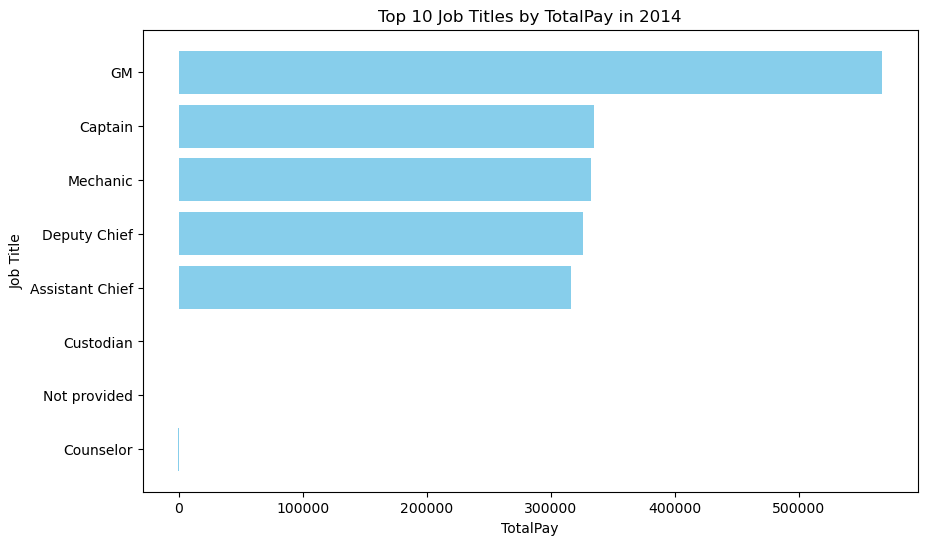

In [31]:
# Q5: Plot the top 10 job titles with the highest TotalPay in 2014.


import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "JobTitle": ["GM","Captain","Mechanic","Deputy Chief","Assistant Chief","Custodian","Not provided","Not provided","Not provided","Counselor"],
    "Year": [2014,2014,2014,2014,2014,2014,2014,2014,2014,2014],
    "TotalPay": [567595.43, 335279.91, 332343.61, 326373.19, 316285.74, 0, 0, 0, 0, -618.13]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

top_jobs_2014 = pd.read_sql_query("""
    SELECT JobTitle, TotalPay
    FROM employees
    WHERE Year=2014
    ORDER BY TotalPay DESC
    LIMIT 10
""", conn)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_jobs_2014['JobTitle'], top_jobs_2014['TotalPay'], color='skyblue')
plt.xlabel("TotalPay")
plt.ylabel("Job Title")
plt.title("Top 10 Job Titles by TotalPay in 2014")
plt.gca().invert_yaxis()  # Highest pay on top
plt.show()


In [32]:
# Q6: Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "JobTitle": ["GM","Captain","Mechanic","Deputy Chief","Assistant Chief","Custodian","Not provided","Counselor"],
    "OvertimePay": [0, 160000, 180000, 140000, 200000, 0, 0, 0]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

high_overtime = pd.read_sql_query("""
    SELECT JobTitle, OvertimePay
    FROM employees
    WHERE OvertimePay > 150000 AND JobTitle != 'Not provided'
""", conn)

print(high_overtime)


          JobTitle  OvertimePay
0          Captain       160000
1         Mechanic       180000
2  Assistant Chief       200000


In [33]:
# Q7: Find all employees whose job titles contain the word “CHIEF”

import pandas as pd
import sqlite3


df = pd.DataFrame({
    "EmployeeName": ["PATRICK GARDNER","DAVID SULLIVAN","ALBERT PARDINI","JOE SMITH"],
    "JobTitle": ["DEPUTY CHIEF OF DEPARTMENT","ASSISTANT DEPUTY CHIEF II","CAPTAIN III","MECHANIC"]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

chief_employees = pd.read_sql_query("""
    SELECT EmployeeName, JobTitle
    FROM employees
    WHERE UPPER(JobTitle) LIKE '%CHIEF%'
""", conn)

print(chief_employees)


      EmployeeName                    JobTitle
0  PATRICK GARDNER  DEPUTY CHIEF OF DEPARTMENT
1   DAVID SULLIVAN   ASSISTANT DEPUTY CHIEF II


In [34]:
# Q8: Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "EmployeeName": ["Alice","Bob","Charlie","David","Eve"],
    "JobTitle": ["Fire Engineer","Software Engineer","Firefighter","Civil Engineer","Police Officer"],
    "Year": [2012,2012,2013,2013,2012]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

count_query = pd.read_sql_query("""
    SELECT COUNT(*) AS EmployeeCount
    FROM employees
    WHERE (UPPER(JobTitle) LIKE '%ENGINEER%' OR UPPER(JobTitle) LIKE '%FIRE%')
      AND Year IN (2012, 2013)
""", conn)

print(count_query)


   EmployeeCount
0              4


In [35]:
# Q9: Distinct job titles starting with "CAPTAIN"

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "JobTitle": [
        "CAPTAIN III (POLICE DEPARTMENT)",
        "CAPTAIN II (FIRE DEPARTMENT)",
        "LIEUTENANT",
        "CAPTAIN I (POLICE DEPARTMENT)",
        "SERGEANT"
    ]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

captain_titles = pd.read_sql_query("""
    SELECT DISTINCT JobTitle
    FROM employees
    WHERE JobTitle LIKE 'CAPTAIN%'
""", conn)

print(captain_titles)


                          JobTitle
0  CAPTAIN III (POLICE DEPARTMENT)
1     CAPTAIN II (FIRE DEPARTMENT)
2    CAPTAIN I (POLICE DEPARTMENT)


In [37]:
# Q10: Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

import pandas as pd
import sqlite3

df = pd.DataFrame({
    "EmployeeName": ["Alice","Bob","Charlie","Not Provided","David"],
    "BasePay": [60000, 80000, 45000, 70000, 55000],
    "TotalPay": [140000, 160000, 100000, 120000, 140000]
})

conn = sqlite3.connect(":memory:")
df.to_sql("employees", conn, index=False, if_exists="replace")

result = pd.read_sql_query("""
    SELECT EmployeeName, BasePay, TotalPay
    FROM employees
    WHERE BasePay > 50000
      AND TotalPay < 150000
      AND EmployeeName != 'Not Provided'
""", conn)

print(result)


  EmployeeName  BasePay  TotalPay
0        Alice    60000    140000
1        David    55000    140000
